Setting up Github repo structure

In [1]:
#creating .gitignore
%%bash
cat > .gitignore
.*
.gitignore

In [2]:
#converting content folder into github repo
%%bash
git init

Initialized empty Git repository in /content/.git/


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>


In [3]:
#removing the sample_data subfolder
%%bash
rm -r sample_data

In [4]:
#creating a high-level README
%%bash
cat > README.md
This repository has been created towards the completion of the Final Individual Project for CXPT 501 Biomedical Datascience.
This project involves the application of tools and techniques of python, its data visualization and analysis libararies, and biostatistics to clean, visualize, and analyze
data from a subset of the PIONEER-HF study dataset.

Study:    Comparison of Sacubitril/​Valsartan Versus Enalapril on Effect on NT-proBNP in Patients Stabilized From an Acute Heart Failure Episode. (PIONEER-HF)
CTG link: https://clinicaltrials.gov/study/NCT02554890
This study investigates the effect of combination treatment initiation with sacubitril/valsartan compared to enalapril on time averaged proportional change in NT-proBNP.
The sample are patients who have been stabilized after hospitalization for acute decompensated heart failure and reduced ejection fraction.

Subfolders include:
1. Starting_Data - Contains the data saved as .csv files. DataFrames created after cleaning and removal of patients who do not meet Inclusion Critera are included.
2. Figures - Contains all generated figures.
3. Statistics - Contains all analyses conducted on the cleaned data.
4. Code - Contains the code used for visualization and analysis.

In [5]:
%%bash
mkdir Starting_Data
mkdir Figures
mkdir Statistics
mkdir Code

Importing libraries, loading data and setting up a clean dataframe for analysis

In [6]:
#importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
#defining filepaths
#dataset GitHub direct link
datasetinpath = 'https://raw.githubusercontent.com/Mangul-Lab-USC/CXPT-501-Fall_23/main/Kalyani_Divgi.csv'
rawoutput = '/content/Starting_Data/Rawdata.csv'
cleandatapath = '/content/Starting_Data/NaNsremoved.csv'
ICdatapath = '/content/Starting_Data/DataincludedperIC.csv'

In [8]:
#importing the full dataset from GitHub direct link and saving it to a dataframe 'rawdf'
rawdf = pd.read_csv(datasetinpath)

#visualizing the start of the dataset
rawdf.head()

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,49.0,Male,Native American,Not Hispanic or Latino,168.0,82.0,never,5686.890,4248.107,3173.336,1444.487,No,26.813,Yes,Enalapril,No,No,No
1,45.0,Female,Native American,Hispanic or Latino,183.0,67.0,current,6024.757,4500.493,3361.868,1672.545,Yes,28.885,No,Enalapril,No,No,No
2,76.0,Male,Other,Hispanic or Latino,161.0,99.0,current,6407.639,4786.506,3575.520,1448.235,No,34.911,Yes,Enalapril,No,No,No
3,36.0,Male,Asian,Hispanic or Latino,198.0,67.0,current,5915.338,4418.757,3300.811,1375.346,No,26.936,Yes,Enalapril,No,No,No
4,60.0,Female,Other,Not Hispanic or Latino,163.0,47.0,current,5377.015,4016.630,3000.423,1401.118,No,34.767,Yes,Enalapril,No,No,No


In [9]:
#visualizing the end of the dataset
rawdf.tail()

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
995,23.0,Male,Unknown,Not Hispanic or Latino,169.0,99.0,never,7144.736,3808.144,2029.741,1506.853,No,32.554,No,Sacubitril-valsartan,Yes,No,No
996,56.0,Female,Pacific Islander,Not Hispanic or Latino,194.0,70.0,current,5853.902,3120.130,1663.029,1707.860,No,26.038,Yes,Sacubitril-valsartan,No,No,No
997,76.0,Male,Black,Hispanic or Latino,155.0,101.0,former,6464.746,3445.710,1836.563,1429.200,Yes,48.167,No,Sacubitril-valsartan,No,No,No
998,76.0,Female,Caucasian,Hispanic or Latino,182.0,103.0,never,5348.916,2850.972,1519.568,1410.060,Yes,30.025,Yes,Sacubitril-valsartan,No,Yes,No
999,69.0,Female,Native American,Hispanic or Latino,211.0,63.0,current,5276.224,2812.227,1498.917,1757.095,No,33.099,Yes,Sacubitril-valsartan,No,No,No


In [10]:
#checking data types
rawdf.dtypes

Age                                       float64
Sex                                        object
Race                                       object
Ethnicity                                  object
Height (cm)                               float64
Weight (kg)                               float64
Smoking history                            object
Pre-treatment NT-proBNP (pg/mL)           float64
Week 4 NT-proBNP (pg/mL)                  float64
Week 8 NT-proBNP (pg/mL)                  float64
Pre-treatment BNP (pg/mL)                 float64
Prior use of ACEi/ARB                      object
Left ventricular ejection fraction (%)    float64
Chronic renal insufficiency                object
Group                                      object
Symptomatic hypotension                    object
Hyperkalemia                               object
Death                                      object
dtype: object

In [11]:
#checking NaNs
rawdf.isnull().sum()

Age                                       0
Sex                                       2
Race                                      0
Ethnicity                                 0
Height (cm)                               2
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           1
Week 4 NT-proBNP (pg/mL)                  1
Week 8 NT-proBNP (pg/mL)                  3
Pre-treatment BNP (pg/mL)                 1
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               2
Group                                     0
Symptomatic hypotension                   2
Hyperkalemia                              0
Death                                     0
dtype: int64

In [12]:
#saving raw dataframe
rawdf.to_csv(rawoutput)

In [13]:
#removing NaN values by dropping all rows with any NaN values and saving it to a new dataframe 'cleandf'
cleandf = rawdf.dropna(how='any')
cleandf.isnull().sum()

Age                                       0
Sex                                       0
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
dtype: int64

In [14]:
#saving cleaned data for reference
cleandf.to_csv(cleandatapath)

In [15]:
#stating how many records were removed for missing data
NaNremoved = len(rawdf) - len(cleandf)
clean = len(cleandf)
print(NaNremoved, 'records were excluded due to missing data')
print()
print(clean, 'complete records remain and are assessed against Inclusion Criteria')

14 records were excluded due to missing data

986 complete records remain and are assessed against Inclusion Criteria


In [16]:
#selecting data based on inclusion criteria
#1 create a subset of columns that form the inclusion criteria 'Icriteria'
Icriteria = ['Age','Pre-treatment NT-proBNP (pg/mL)','Pre-treatment BNP (pg/mL)','Left ventricular ejection fraction (%)']

In [17]:
#2 create a for loop that will go through each inclusion criteria column and clean it according to the conditions provided in the nested if loops

'''
The inclusion criteria are as follows:

  age >= 18
  pre-treatment NT-proBNP >= 1600 pg/mL
  pre-treatment BNP >= 400 pg/mL
  left ventricular ejection fraction <= 40%
'''


#2a assigning the number of iterations for the loop based on length of 'Icriteria'
for IC in range(0,len(Icriteria)):

  #assigning condition for age based on inclusion cutoffs
  if Icriteria[IC] == 'Age':
    #saving selected data to a new dataset based on IC
    cleandf2 = cleandf.loc[cleandf['Age'] >= 18.0]
    #assigning the number of entries removed based on IC to a variable
    exclude1 = len(cleandf) - len(cleandf2)
    #printing the number of entries removed for this particular IC
    print(exclude1, 'patients have been excluded for not being 18 years or older')
    #printing a space for readability
    print()

  #assigning condition for N-terminal pro b-type natriuretic peptide levels based on inclusion criteria
  elif Icriteria[IC] == 'Pre-treatment NT-proBNP (pg/mL)':
    cleandf3 = cleandf2.loc[cleandf2['Pre-treatment NT-proBNP (pg/mL)'] >= 1600]
    exclude2 = len(cleandf2) - len(cleandf3)
    print(exclude2, 'patients have been excluded for not having Pre-treatment NT-proBNP >= 1600 pg/mL')
    print()

  #assigning condition for b-type natriuretic peptide levels based on inlcusion criteria
  elif Icriteria[IC] == 'Pre-treatment BNP (pg/mL)':
    cleandf4 = cleandf3.loc[cleandf3['Pre-treatment BNP (pg/mL)'] >= 400]
    exclude3 = len(cleandf3)-len(cleandf4)
    print(exclude3, 'patients have been excluded for not having Pre-treatment BNP >= 400 pg/mL')
    print()

  #assigning condition for left ventricular ejection fraction % based on inclusion criteria
  elif Icriteria[IC] == 'Left ventricular ejection fraction (%)':
    cleandf5 = cleandf4.loc[cleandf4['Left ventricular ejection fraction (%)'] <= 40]
    exclude4 = len(cleandf4) - len(cleandf5)
    print(exclude4, 'patients have been excluded for not having Left ventricular ejection fraction <= 40%')
    print()

42 patients have been excluded for not being 18 years or older

0 patients have been excluded for not having Pre-treatment NT-proBNP >= 1600 pg/mL

0 patients have been excluded for not having Pre-treatment BNP >= 400 pg/mL

78 patients have been excluded for not having Left ventricular ejection fraction <= 40%



In [18]:
#2b creating an explicit copy of the cleaned dataframe to avoid 'SettingWithCopyWarning' and unexpected changes to the dataset during analysis
cleandf5 = cleandf5.copy()

In [19]:
#2c printing final number of patients excluded
totexclude = len(cleandf) - len(cleandf5)
print(totexclude, 'patients were excluded on the basis of predefined inclusion criteria')
print()

#3 Confirming how many patients remain
remaining = len(cleandf5)
print(remaining, 'patients meet inclusion criteria and are included in the analysis')

120 patients were excluded on the basis of predefined inclusion criteria

866 patients meet inclusion criteria and are included in the analysis


In [20]:
#4 adding a BMI column
'''
The BMI calculation is:
weight (kg)/(height(m)**2)
'''
cleandf5.loc[:, 'BMI'] = cleandf5['Weight (kg)']/((cleandf5['Height (cm)']/100)**2)

#saving data to csv
cleandf5.to_csv(ICdatapath)

Splitting data by columns containing numeric and categorical data for ease of analysis and visualization

In [21]:
#retrieving column data types
coltypes1 = cleandf5.dtypes

In [22]:
#creating a list of all column types
coltypes2 = coltypes1.to_list()
coltypes2

[dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64')]

In [23]:
#saving the columns to a list 'Tcolumns'
Tcolumns = cleandf5.columns.tolist()
Tcolumns

['Age',
 'Sex',
 'Race',
 'Ethnicity',
 'Height (cm)',
 'Weight (kg)',
 'Smoking history',
 'Pre-treatment NT-proBNP (pg/mL)',
 'Week 4 NT-proBNP (pg/mL)',
 'Week 8 NT-proBNP (pg/mL)',
 'Pre-treatment BNP (pg/mL)',
 'Prior use of ACEi/ARB',
 'Left ventricular ejection fraction (%)',
 'Chronic renal insufficiency',
 'Group',
 'Symptomatic hypotension',
 'Hyperkalemia',
 'Death',
 'BMI']

In [24]:
#creating empty lists to which columns with numeric and categoric data will be saved
#empty list for columns containing numeric data
numcol = []
#empty list for columns containing categorical data
catcol = []

In [25]:
#checking the datatypes of each column and assigning them to a list of either numeric or categorical data containing columns
for each in range(0,len(coltypes2)):
  #condition for the column type being dtype 'O' or object, i.e., categorical
  if coltypes2[each] == 'O':
    catcol.append(Tcolumns[each])
  #condition for the column type being, not an object, i.e., dtype 'float64', i.e., numeric
  else:
    numcol.append(Tcolumns[each])

In [26]:
#checking list of numeric data containing columns
numcol

['Age',
 'Height (cm)',
 'Weight (kg)',
 'Pre-treatment NT-proBNP (pg/mL)',
 'Week 4 NT-proBNP (pg/mL)',
 'Week 8 NT-proBNP (pg/mL)',
 'Pre-treatment BNP (pg/mL)',
 'Left ventricular ejection fraction (%)',
 'BMI']

In [27]:
#checking list of categorical data containing columns
catcol

['Sex',
 'Race',
 'Ethnicity',
 'Smoking history',
 'Prior use of ACEi/ARB',
 'Chronic renal insufficiency',
 'Group',
 'Symptomatic hypotension',
 'Hyperkalemia',
 'Death']

Visualizing baseline NT-proBNP and BNP among different categories of patients

In [28]:
#setting contexts and styles for plots. This style and context applies to all plots/figures
sns.despine()
sns.set(style='darkgrid')

<Figure size 640x480 with 0 Axes>

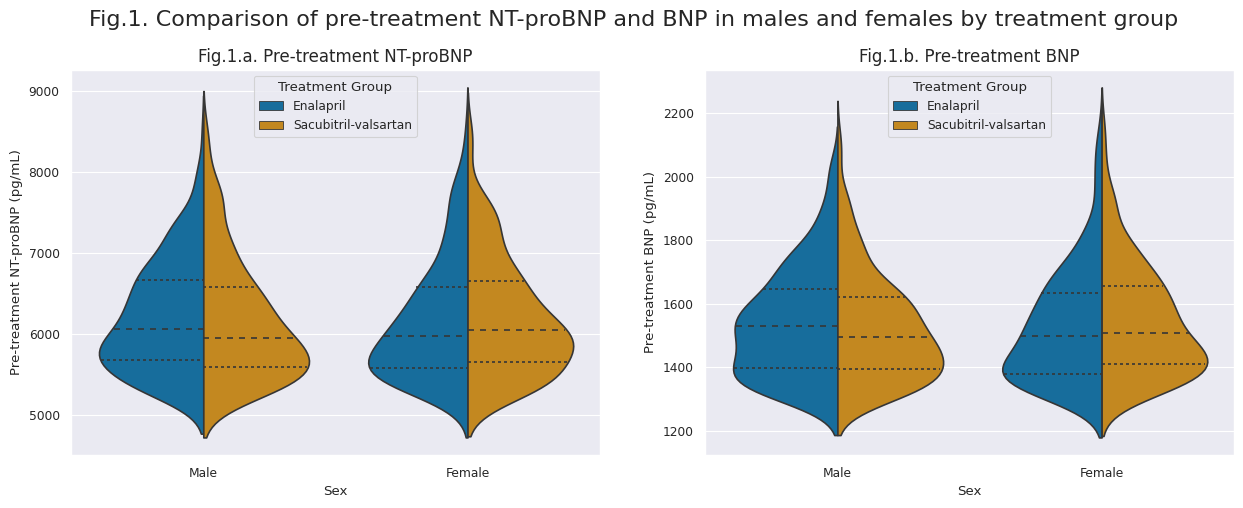

In [29]:
#setting context
sns.set_context('paper')

#creating a base for two plots in the same figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#checking differences in pre-treatment N-terminal pro b-type natriuretic peptide between males and females in each treatment group
ax1 = sns.violinplot(data=cleandf5, x='Sex', y='Pre-treatment NT-proBNP (pg/mL)', hue='Group', palette='colorblind',
                    split=True, scale='count', inner='quartile', ax=axes[0])
ax1.legend(title='Treatment Group', loc='upper center')
ax1.set_title('Fig.1.a. Pre-treatment NT-proBNP', fontsize=12)

#checking difference in pre-treatment BNP between males and females in each treatment group
ax2 = sns.violinplot(data=cleandf5, x='Sex', y='Pre-treatment BNP (pg/mL)', hue='Group', palette='colorblind',
                    split=True, scale='count', inner='quartile', ax=axes[1])
ax2.legend(title='Treatment Group', loc='upper center')
ax2.set_title('Fig.1.b. Pre-treatment BNP', fontsize=12)

fig.suptitle('Fig.1. Comparison of pre-treatment NT-proBNP and BNP in males and females by treatment group', fontsize=16, y=1)

plt.savefig('/content/Figures/Pretreatment_NTproBNP,BNP_sex_group.pdf', bbox_inches='tight')

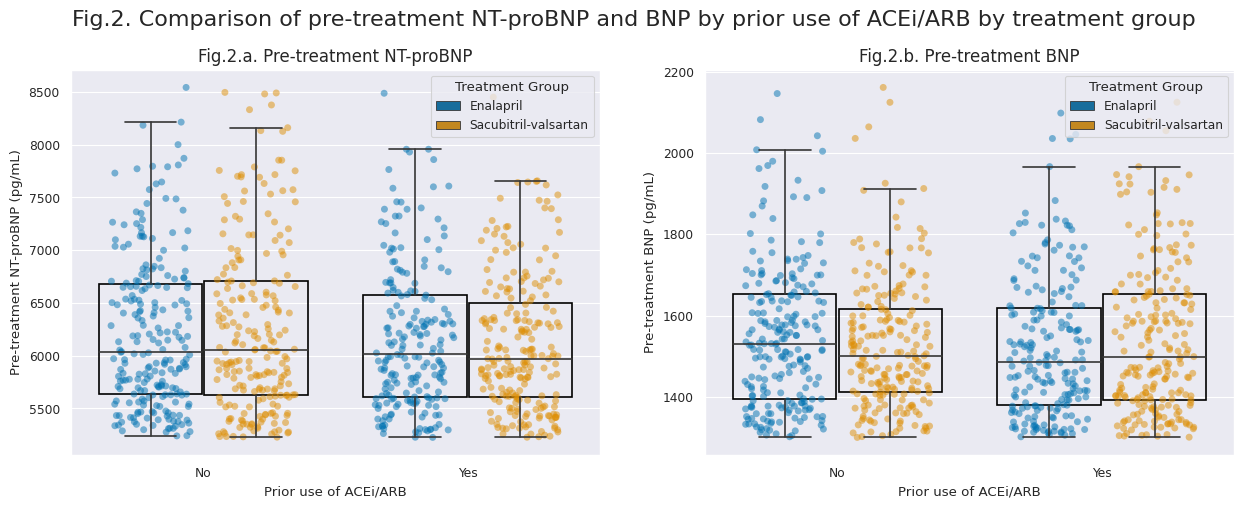

In [30]:
#checking differences in pre-treatment NT-BNP and BNP based on prior ACEi/ARP use in each treatment group

#setting context
sns.set_context('paper')

#creating a base for two plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#checking for difference in pre-treatment NT-BNP
ax3 = sns.boxplot(data=cleandf5, x='Prior use of ACEi/ARB', y='Pre-treatment NT-proBNP (pg/mL)', hue='Group', palette='colorblind',
                  ax=axes[0], zorder=5, showfliers = False, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)})
sns.stripplot(data=cleandf5, x='Prior use of ACEi/ARB', y='Pre-treatment NT-proBNP (pg/mL)', hue='Group', palette='colorblind', ax=axes[0],
              alpha=0.5, dodge=True, jitter=0.3, zorder=1)
handles3, labels3 = ax3.get_legend_handles_labels()
labels3 = ['Enalapril','Sacubitril-valsartan']
ax3.legend(handles3, labels3, title='Treatment Group', loc='upper right', bbox_to_anchor=(1,1))
ax3.set_title('Fig.2.a. Pre-treatment NT-proBNP', fontsize=12)

#checking for differences in pre-treatment BNP
ax4 = sns.boxplot(data=cleandf5, x='Prior use of ACEi/ARB', y='Pre-treatment BNP (pg/mL)', hue='Group', palette='colorblind',
                  ax=axes[1], zorder=5, showfliers = False, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)})
sns.stripplot(data=cleandf5, x='Prior use of ACEi/ARB', y='Pre-treatment BNP (pg/mL)', hue='Group', palette='colorblind', ax=axes[1],
              alpha=0.5, dodge=True, jitter=0.3, zorder=1)
handles4, labels4 = ax4.get_legend_handles_labels()
labels4 = ['Enalapril','Sacubitril-valsartan']
ax4.legend(handles4, labels4, title='Treatment Group', loc='upper right', bbox_to_anchor=(1,1))
ax4.set_title('Fig.2.b. Pre-treatment BNP', fontsize=12)

fig.suptitle('Fig.2. Comparison of pre-treatment NT-proBNP and BNP by prior use of ACEi/ARB by treatment group', fontsize=16, y=1)

plt.savefig('/content/Figures/Pretreatment_NTproBNP,BNP_ACEi_group.pdf', bbox_inches='tight')

Exploring the efficacy of sacubitril/valsartan and enalapril at 4 weeks and 8 weeks

In [31]:
#creating a dataframe of baseline/ pre-treatment:
baselinedf = cleandf5[['Pre-treatment NT-proBNP (pg/mL)','Group']]

#creating an explicit copy
baselinedf = baselinedf.copy()

#adding timepoint column
baselinedf['Timepoint'] = 'baseline'

baselinedf

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint
0,5686.890,Enalapril,baseline
1,6024.757,Enalapril,baseline
2,6407.639,Enalapril,baseline
3,5915.338,Enalapril,baseline
4,5377.015,Enalapril,baseline
...,...,...,...
994,5619.783,Sacubitril-valsartan,baseline
995,7144.736,Sacubitril-valsartan,baseline
996,5853.902,Sacubitril-valsartan,baseline
998,5348.916,Sacubitril-valsartan,baseline


In [32]:
#creating a dataframe for week 4 NT-proBNP:
week4df = cleandf5[['Week 4 NT-proBNP (pg/mL)', 'Group']]

#creating explicit copy
week4df = week4df.copy()

#adding timepoint column
week4df['Timepoint'] = 'week 4'
week4df

,Week 4 NT-proBNP (pg/mL),Group,Timepoint
0,4248.107,Enalapril,week 4
1,4500.493,Enalapril,week 4
2,4786.506,Enalapril,week 4
3,4418.757,Enalapril,week 4
4,4016.630,Enalapril,week 4
...,...,...,...
994,2995.344,Sacubitril-valsartan,week 4
995,3808.144,Sacubitril-valsartan,week 4
996,3120.130,Sacubitril-valsartan,week 4
998,2850.972,Sacubitril-valsartan,week 4


In [33]:
#creating a dataframe for week 8 NT=proBNP
week8df = cleandf5[['Week 8 NT-proBNP (pg/mL)', 'Group']]

#creating an explicit copy
week8df = week8df.copy()

#adding timepoint column
week8df['Timepoint'] = 'week 8'
week8df

,Week 8 NT-proBNP (pg/mL),Group,Timepoint
0,3173.336,Enalapril,week 8
1,3361.868,Enalapril,week 8
2,3575.520,Enalapril,week 8
3,3300.811,Enalapril,week 8
4,3000.423,Enalapril,week 8
...,...,...,...
994,1596.518,Sacubitril-valsartan,week 8
995,2029.741,Sacubitril-valsartan,week 8
996,1663.029,Sacubitril-valsartan,week 8
998,1519.568,Sacubitril-valsartan,week 8


In [34]:
#creating a list of dataframes to merge
frames = [baselinedf, week4df, week8df]

In [35]:
#mergind the three ntprobnp dataframes at different timepoints into a single dataframe using .concat()
ntprobnpdf = pd.concat(frames)
ntprobnpdf

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,5686.890,Enalapril,baseline,NaN,NaN
1,6024.757,Enalapril,baseline,NaN,NaN
2,6407.639,Enalapril,baseline,NaN,NaN
3,5915.338,Enalapril,baseline,NaN,NaN
4,5377.015,Enalapril,baseline,NaN,NaN
...,...,...,...,...,...
994,NaN,Sacubitril-valsartan,week 8,NaN,1596.518
995,NaN,Sacubitril-valsartan,week 8,NaN,2029.741
996,NaN,Sacubitril-valsartan,week 8,NaN,1663.029
998,NaN,Sacubitril-valsartan,week 8,NaN,1519.568


In [36]:
#Replacing all NaNs with 0.0
ntprobnpdf2 = ntprobnpdf.fillna(0)
ntprobnpdf2

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,5686.890,Enalapril,baseline,0.0,0.000
1,6024.757,Enalapril,baseline,0.0,0.000
2,6407.639,Enalapril,baseline,0.0,0.000
3,5915.338,Enalapril,baseline,0.0,0.000
4,5377.015,Enalapril,baseline,0.0,0.000
...,...,...,...,...,...
994,0.000,Sacubitril-valsartan,week 8,0.0,1596.518
995,0.000,Sacubitril-valsartan,week 8,0.0,2029.741
996,0.000,Sacubitril-valsartan,week 8,0.0,1663.029
998,0.000,Sacubitril-valsartan,week 8,0.0,1519.568


In [37]:
#creating a new column that will store all NT-proBNP values at all three timepoints
ntprobnpdf2['NT-proBNP (pg/mL)'] = 0

#resetting index to avoid indexing errors
ntprobnpdf2.reset_index(drop=True, inplace=True)
ntprobnpdf2

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),NT-proBNP (pg/mL)
0,5686.890,Enalapril,baseline,0.0,0.000,0
1,6024.757,Enalapril,baseline,0.0,0.000,0
2,6407.639,Enalapril,baseline,0.0,0.000,0
3,5915.338,Enalapril,baseline,0.0,0.000,0
4,5377.015,Enalapril,baseline,0.0,0.000,0
...,...,...,...,...,...,...
2593,0.000,Sacubitril-valsartan,week 8,0.0,1596.518,0
2594,0.000,Sacubitril-valsartan,week 8,0.0,2029.741,0
2595,0.000,Sacubitril-valsartan,week 8,0.0,1663.029,0
2596,0.000,Sacubitril-valsartan,week 8,0.0,1519.568,0


In [38]:
#adding baseline NT-proBNP values to the the NT-proBNP column
ntprobnpdf2.loc[ntprobnpdf2['Pre-treatment NT-proBNP (pg/mL)'] > 0, 'NT-proBNP (pg/mL)'] = ntprobnpdf2['Pre-treatment NT-proBNP (pg/mL)']

In [39]:
#adding week 4 NT-proBNP values to the the NT-proBNP column
ntprobnpdf2.loc[ntprobnpdf2['Week 4 NT-proBNP (pg/mL)'] > 0, 'NT-proBNP (pg/mL)'] = ntprobnpdf2['Week 4 NT-proBNP (pg/mL)']

In [40]:
#adding week 8 NT-proBNP values to the the NT-proBNP column
ntprobnpdf2.loc[ntprobnpdf2['Week 8 NT-proBNP (pg/mL)'] > 0, 'NT-proBNP (pg/mL)'] = ntprobnpdf2['Week 8 NT-proBNP (pg/mL)']

In [41]:
ntprobnpdf2

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),NT-proBNP (pg/mL)
0,5686.890,Enalapril,baseline,0.0,0.000,5686.890
1,6024.757,Enalapril,baseline,0.0,0.000,6024.757
2,6407.639,Enalapril,baseline,0.0,0.000,6407.639
3,5915.338,Enalapril,baseline,0.0,0.000,5915.338
4,5377.015,Enalapril,baseline,0.0,0.000,5377.015
...,...,...,...,...,...,...
2593,0.000,Sacubitril-valsartan,week 8,0.0,1596.518,1596.518
2594,0.000,Sacubitril-valsartan,week 8,0.0,2029.741,2029.741
2595,0.000,Sacubitril-valsartan,week 8,0.0,1663.029,1663.029
2596,0.000,Sacubitril-valsartan,week 8,0.0,1519.568,1519.568


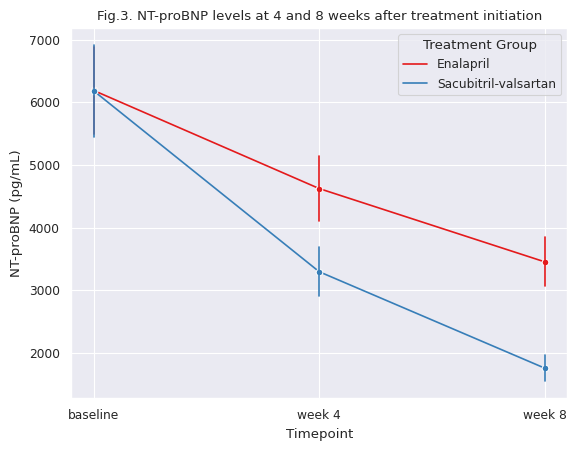

In [42]:
#setting context
sns.set_context('paper')

#plotting the NT-proBNP levels against time, split by treatment group to visualize differences in NT-proBNP reduction by group
ax5 = sns.lineplot(data=ntprobnpdf2, x='Timepoint', y='NT-proBNP (pg/mL)', hue='Group', palette='Set1' , errorbar='sd', err_style='bars', marker='o')
ax5.set_title('Fig.3. NT-proBNP levels at 4 and 8 weeks after treatment initiation')

ax5.legend(title='Treatment Group', loc='upper right')

plt.savefig('/content/Figures/ntprobnpchange_4_8weeks.pdf', bbox_inches='tight')

Exploring the efficacy of sacubitril/valsartan and enalapril by BMI ranges

In [43]:
'''
BMI ranges are defined as:
underweight - < 18.5
healthy weight - 18.5-24.9
overweight - 25.0-29.9
obese - > 30.0
'''
#creating a subset of data for analysis
heatmapdf = cleandf5[['Group', 'BMI', 'Week 8 NT-proBNP (pg/mL)']]

#creating an explicit copy
heatmapdf = heatmapdf.copy()

#creating a column for BMI categories
heatmapdf.loc[heatmapdf['BMI'] < 18.5, 'BMI group'] = 'underweight (BMI<18.5)'
heatmapdf.loc[(heatmapdf['BMI'] >= 18.5) & (heatmapdf['BMI'] < 25), 'BMI group'] = 'healthy (18.5<BMI<25)'
heatmapdf.loc[(heatmapdf['BMI'] >= 25) & (heatmapdf['BMI'] < 29.9), 'BMI group'] = 'overweight (25<BMI<30)'
heatmapdf.loc[heatmapdf['BMI'] >= 30, 'BMI group'] = 'obese (BMI>30)'

heatmapdf

,Group,BMI,Week 8 NT-proBNP (pg/mL),BMI group
0,Enalapril,29.053288,3173.336,overweight (25<BMI<30)
1,Enalapril,20.006569,3361.868,healthy (18.5<BMI<25)
2,Enalapril,38.192971,3575.520,obese (BMI>30)
3,Enalapril,17.090093,3300.811,underweight (BMI<18.5)
4,Enalapril,17.689789,3000.423,underweight (BMI<18.5)
...,...,...,...,...
994,Sacubitril-valsartan,38.192971,1596.518,obese (BMI>30)
995,Sacubitril-valsartan,34.662652,2029.741,obese (BMI>30)
996,Sacubitril-valsartan,18.599214,1663.029,healthy (18.5<BMI<25)
998,Sacubitril-valsartan,31.095278,1519.568,obese (BMI>30)


In [44]:
#grouping data for analysis
heatgroup = heatmapdf.groupby(['BMI group', 'Group']).mean()
heatgroup.reset_index(drop=False, inplace=True)
heatgroup

,BMI group,Group,BMI,Week 8 NT-proBNP (pg/mL)
0,healthy (18.5<BMI<25),Enalapril,21.991054,3487.312885
1,healthy (18.5<BMI<25),Sacubitril-valsartan,21.766151,1767.498432
2,obese (BMI>30),Enalapril,36.559784,3476.320871
3,obese (BMI>30),Sacubitril-valsartan,35.743091,1751.516198
4,overweight (25<BMI<30),Enalapril,27.273228,3398.036233
5,overweight (25<BMI<30),Sacubitril-valsartan,27.594658,1771.772897
6,underweight (BMI<18.5),Enalapril,14.613685,3447.450756
7,underweight (BMI<18.5),Sacubitril-valsartan,14.927375,1742.023195


In [45]:
#pivoting for a matrix
groupmatrix = heatgroup.pivot('BMI group', 'Group', 'Week 8 NT-proBNP (pg/mL)')
groupmatrix

<ipython-input-45-d40cbec68a60>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  groupmatrix = heatgroup.pivot('BMI group', 'Group', 'Week 8 NT-proBNP (pg/mL)')


Group,Enalapril,Sacubitril-valsartan
BMI group,,
healthy (18.5<BMI<25),3487.312885,1767.498432
obese (BMI>30),3476.320871,1751.516198
overweight (25<BMI<30),3398.036233,1771.772897
underweight (BMI<18.5),3447.450756,1742.023195


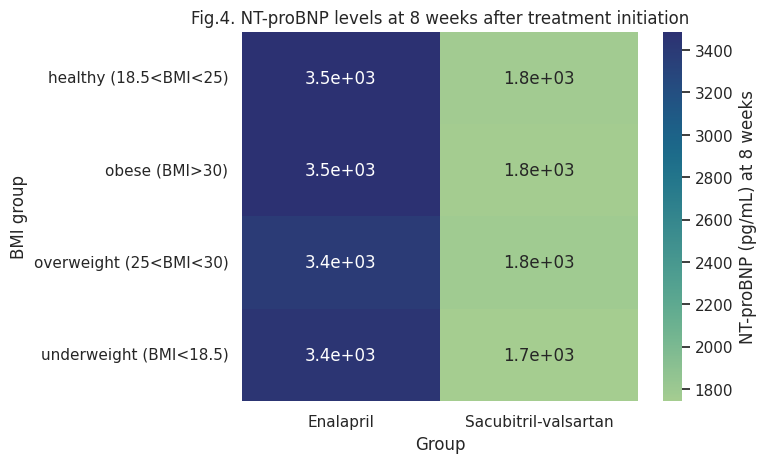

In [46]:
#setting context
sns.set_context('notebook')

#plotting heatmap
ax6 = sns.heatmap(data=groupmatrix, annot=True, cmap='crest', cbar_kws={'label': 'NT-proBNP (pg/mL) at 8 weeks'})
ax6.set_title('Fig.4. NT-proBNP levels at 8 weeks after treatment initiation')

plt.savefig('/content/Figures/ntprobnpchange_8weeks_heatmap.pdf', bbox_inches='tight')

Statistical analysis: </br>
Median, mean, standard deviation by treatment group

In [47]:
#creating a subset of data including only continuous data
statdf = cleandf5[['Group', 'Age', 'Height (cm)', 'Weight (kg)', 'Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)', 'Pre-treatment BNP (pg/mL)', 'Left ventricular ejection fraction (%)', 'BMI']]

statdf2 = statdf.groupby('Group').agg(['median','mean','std'])
statdf2.to_csv('/content/Statistics/median_mean_std_treatmentgroup.csv')

Hypothesis testing (1):

H0: there is no difference between pre-treatment and week 4 NT-proBNP levels in the group treated with sacubitril-valsartan </br>
H1: There is a difference between pre-treatment and week 4 NT-proBNP levels in the group treated with sacubitril-valsartan

In [109]:
#creating a subset of the data for the sacubitril-valsartan group
h1df = statdf.loc[statdf['Group']=='Sacubitril-valsartan'][['Age', 'Pre-treatment NT-proBNP (pg/mL)','Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)']].copy()

Outliers: </br>
Since this is a sample that has been selected through strict inclusion criteria, we will assume that outliers are a result of natural variation and not confounding factors. </br>
Therefore, outliers will not be removed for analysis.

In [110]:
'''
Analysing using paired t-test as large sample size meets CLT requirement for assuming normality in the delta / difference between baseline and week 4
'''
#using two sided as hypothesis states difference broadly
stat1, pvalue1 = stats.ttest_rel(h1df['Week 4 NT-proBNP (pg/mL)'], h1df['Pre-treatment NT-proBNP (pg/mL)'])

In [111]:
#saving the results
result1 = pd.DataFrame({'Statistic':[stat1], 'P-value':[pvalue1]})
result1.to_csv('/content/Statistics/result1.csv')

Result 1 : </br>
In sacubitril group, the NT-proBNP levels were significantly different at baseline and week 4.

The test statistic suggests that the week 4 levels were significantly lower than baseline
_____________

Hypothesis testing (2): </br>
H0: there is no difference between pre-treatment and week 8 NT-proBNP levels in the group treated with sacubitril-valsartan </br>
H1: There is a difference between pre-treatment and week 8 NT-proBNP levels in the group treated with sacubitril-valsartan

Outliers: </br>
Since this is a sample that has been selected through strict inclusion criteria, we will assume that outliers are a result of natural variation and not confounding factors. </br>
Therefore, outliers will not be removed for analysis.

In [112]:
'''
Analysing using paired t-test as large sample size meets CLT requirement for assuming normality in the delta / difference between baseline and week 8
'''
#using two sided as hypothesis states difference broadly
stat2, pvalue2 = stats.ttest_rel(h1df['Week 8 NT-proBNP (pg/mL)'], h1df['Pre-treatment NT-proBNP (pg/mL)'])

In [113]:
#saving the results
result2 = pd.DataFrame({'Statistic':[stat2], 'P-value':[pvalue2]})
result2.to_csv('/content/Statistics/result2.csv')

Result 2: </br>
In sacubitril group, the NT-proBNP levels were significantly different at baseline and week 8. The test statistic suggests that the week 8 levels were significantly lower than baseline
______________________________

Hypothesis testing (3): </br>
H0: there is no difference between pre-treatment and week 4 NT-proBNP levels in the group treated with enalapril </br>
H1: There is a difference between pre-treatment and week 4 NT-proBNP levels in the group treated with enalapril

In [114]:
#creating a subset of data for the enalapril group
h3df = statdf.loc[statdf['Group']=='Enalapril'][['Age', 'Pre-treatment NT-proBNP (pg/mL)','Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)']].copy()

Outliers: </br>
Since this is a sample that has been selected through strict inclusion criteria, we will assume that outliers are a result of natural variation and not confounding factors. </br>
Therefore, outliers will not be removed for analysis.

In [128]:
'''
Analysing using paired t-test as large sample size meets CLT requirement for assuming normality in the delta / difference between baseline and week 4
'''
#using two sided as hypothesis states difference broadly
stat3, pvalue3 = stats.ttest_rel(h3df['Week 4 NT-proBNP (pg/mL)'], h3df['Pre-treatment NT-proBNP (pg/mL)'])

In [116]:
#saving results
results3 = pd.DataFrame({'Statistic':[stat3], 'P-value':[pvalue3]})
results3.to_csv('/content/Statistics/result3.csv')

Result 3: </br>
In enalapril group, the NT-proBNP levels were significantly different at baseline and week 4. The test statistic suggests that the week 4 levels were significantly lower than baseline
_______________________________

Hypothesis testing (4): </br>
H0: there is no difference between pre-treatment and week 8 NT-proBNP levels in the group treated with enalapril </br>
H1: There is a difference between pre-treatment and week 8 NT-proBNP levels in the group treated with enalapril

Outliers: </br>
Since this is a sample that has been selected through strict inclusion criteria, we will assume that outliers are a result of natural variation and not confounding factors. </br>
Therefore, outliers will not be removed for analysis.

In [117]:
'''
Analysing using paired t-test as large sample size meets CLT requirement for assuming normality in the delta / difference between baseline and week 4
'''
#using two sided as hypothesis states difference broadly
stat4, pvalue4 = stats.ttest_rel(h3df['Week 8 NT-proBNP (pg/mL)'], h3df['Pre-treatment NT-proBNP (pg/mL)'])

In [118]:
#saving results
results4 = pd.DataFrame({'Statistic':[stat4], 'P-value':[pvalue4]})
results4.to_csv('/content/Statistics/result4.csv')

Result 4: </br>
In enalapril group, the NT-proBNP levels were significantly different at baseline and week 8. The test statistic suggests that the week 8 levels were significantly lower than baseline
______________________

Hypothesis testing (5): </br>
H0: there is no significant difference between the 4 week NT-proBNP levels between the enalapril and saculbitril-valsartan groups </br>
H1: there is a significant difference between the 4 week NT-proBNP levels between the enalapril and saculbitril-valsartan groups

In [119]:
'''
segregating data in group 1 - enalapril and group 2 - sacubitril-valsartan
'''

#enalapril group:
group1 = h3df['Week 4 NT-proBNP (pg/mL)']

#sacubitril-valsartan group:
group2 = h1df['Week 4 NT-proBNP (pg/mL)']

In [139]:
#conducting levene test to assess equality of variance between the two groups
stats.levene(group1, group2)

LeveneResult(statistic=30.655577053249818, pvalue=4.088768359938743e-08)

Outliers: </br>
Since this is a sample that has been selected through strict inclusion criteria, we will assume that outliers are a result of natural variation and not confounding factors. </br>
Therefore, outliers will not be removed for analysis.

In [133]:
'''
Sample size is large enough to meet requirements of CLT and therefore, we will assume noramlity in the both groups.
Therefore, we will proceed with a parametric test

Levene test results suggest that the variances between the two groups are not equal.
Therefore we will proceed with the Welch's T test instead of standard independent T test
'''

#using two sided as hypothesis states difference broadly
stat5, pvalue5 = stats.ttest_ind(group1, group2, equal_var=False)

In [159]:
#checking one sided
stats.ttest_ind(group1, group2, alternative='greater', equal_var=False)

TtestResult(statistic=42.324767878015884, pvalue=5.510626543729204e-205, df=784.1182657223585)

In [134]:
#saving results
results5 = pd.DataFrame({'Statistic':[stat5], 'P-value':[pvalue5]})
results5.to_csv('/content/Statistics/result5.csv')

Result 5: </br>
The NT-proBNP levels at week 4 between the enalapril and sacubitril groups were significantly different. The test statistic suggests NT-proBNP levels are higher in enalapril group.
___________________________

Hypothesis testing (6): </br>
H0: there is no significant difference between the 8 week NT-proBNP levels between the enalapril and saculbitril-valsartan groups </br>
H1: there is a significant difference between the 8 week NT-proBNP levels between the enalapril and saculbitril-valsartan groups

In [138]:
'''
segregating data in group 3 - enalapril and group 4 - sacubitril-valsartan
'''

#enalapril group:
group3 = h3df['Week 8 NT-proBNP (pg/mL)']

#sacubitril-valsartan group:
group4 = h1df['Week 8 NT-proBNP (pg/mL)']

In [140]:
#conducting levene test to assess equality of variance between the two groups
stats.levene(group3, group4)

LeveneResult(statistic=119.5881902741936, pvalue=3.6826292849447277e-26)

Outliers: </br>
Since this is a sample that has been selected through strict inclusion criteria, we will assume that outliers are a result of natural variation and not confounding factors. </br>
Therefore, outliers will not be removed for analysis.

In [147]:
'''
Sample size is large enough to meet requirements of CLT and therefore, we will assume noramlity in the both groups.
Therefore, we will proceed with a parametric test

Levene test results suggest that the variances between the two groups are not equal.
Therefore we will proceed with the Welch's T test instead of standard independent T test
'''

#using two sided as hypothesis states difference broadly
stat6, pvalue6 = stats.ttest_ind(group3, group4, equal_var=False)

In [162]:
#checking one sided
stats.ttest_ind(group3, group4, alternative='greater', equal_var=False)

TtestResult(statistic=79.56726238314091, pvalue=0.0, df=641.5987464381459)

In [142]:
#saving results
results6 = pd.DataFrame({'Statistic':[stat6], 'P-value':[pvalue6]})
results6.to_csv('/content/Statistics/result6.csv')

Result 6: </br>
The NT-proBNP levels at week 8 between the enalapril and sacubitril groups were significantly different. The test statistic suggests NT-proBNP levels are higher in enalapril group.
__________________________

Hypothesis testing (7): </br>
H0: there is no significant difference between the 4 week NT-proBNP levels between the enalapril and saculbitril-valsartan groups among patients 60 years and older </br>
H1: there is a significant difference between the 4 week NT-proBNP levels between the enalapril and saculbitril-valsartan groups among patients 60 years and older

In [143]:
#segregating data

#group for 60 years and older given enalapril
group5 = h3df.loc[h3df['Age'] >= 60]['Week 4 NT-proBNP (pg/mL)']

#group for 60 years and older given sacubitril-valsartan
group6 = h1df.loc[h1df['Age'] >= 60]['Week 4 NT-proBNP (pg/mL)']

In [152]:
#conducting levene test to assess equality of variance between the two groups
stats.levene(group5, group6)

LeveneResult(statistic=2.67206655442972, pvalue=0.10334759778423779)

Outliers: </br>
Since this is a sample that has been selected through strict inclusion criteria, we will assume that outliers are a result of natural variation and not confounding factors. </br>
Therefore, outliers will not be removed for analysis.

In [148]:
'''
Sample size is large enough to meet requirements of CLT and therefore, we will assume noramlity in the both groups.
Therefore, we will proceed with a parametric test

Levene test results suggest that the variances between the two groups are equal.
Therefore we will proceed with the standard independent T test
'''

#using two sided as hypothesis states difference broadly
stat7, pvalue7 = stats.ttest_ind(group5, group6, equal_var=True)

In [168]:
#checking one sided
stats.ttest_ind(group5, group6, alternative='greater', equal_var=True)

TtestResult(statistic=23.061075193973867, pvalue=7.862276241074812e-65, df=257.0)

In [149]:
#saving results
results7 = pd.DataFrame({'Statistic':[stat7], 'P-value':[pvalue7]})
results7.to_csv('/content/Statistics/result7.csv')

Result 7: </br>
The NT-proBNP levels at week 4 between the enalapril and sacubitril groups among patients 60 years or older were significantly different. The test statistic suggests NT-proBNP levels are higher in enalapril group.</br>
__________________


Hypothesis testing (8): </br>
H0: there is no significant difference between the 8 week NT-proBNP levels between the enalapril and saculbitril-valsartan groups among patients 60 years and older </br>
H1: there is a significant difference between the 8 week NT-proBNP levels between the enalapril and saculbitril-valsartan groups among patients 60 years and older

In [150]:
#segregating data

#group for 60 years and older given enalapril
group7 = h3df.loc[h3df['Age'] >= 60]['Week 8 NT-proBNP (pg/mL)']

#group for 60 years and older given sacubitril-valsartan
group8 = h1df.loc[h1df['Age'] >= 60]['Week 8 NT-proBNP (pg/mL)']

Outliers: </br>
Since this is a sample that has been selected through strict inclusion criteria, we will assume that outliers are a result of natural variation and not confounding factors. </br>
Therefore, outliers will not be removed for analysis.

In [155]:
#conducting levene test to assess equality of variance between the two groups
stats.levene(group7, group8)

LeveneResult(statistic=24.71992802277205, pvalue=1.2128817271444665e-06)

In [156]:
'''
Sample size is large enough to meet requirements of CLT and therefore, we will assume noramlity in the both groups.
Therefore, we will proceed with a parametric test

Levene test results suggest that the variances between the two groups are not equal.
Therefore we will proceed with the Welch's T test
'''

#using two sided as hypothesis states difference broadly
stat8, pvalue8 = stats.ttest_ind(group7, group8, equal_var=False)

In [171]:
#checking one sided
stats.ttest_ind(group7, group8, alternative='greater', equal_var=False)

TtestResult(statistic=43.02956785968352, pvalue=1.3597511419831777e-96, df=178.87676743300432)

In [157]:
#saving results
results8 = pd.DataFrame({'Statistic':[stat8], 'P-value':[pvalue8]})
results8.to_csv('/content/Statistics/result8.csv')

Result 8: </br>
The NT-proBNP levels at week 8 between the enalapril and sacubitril groups among patients 60 years or older were significantly different. The test statistic suggests NT-proBNP levels are higher in enalapril group.</br>
__________

Summary of Results:</br>
Result 1 : </br>
In sacubitril group, the NT-proBNP levels were significantly different at baseline and week 4. The test statistic suggests that the week 4 levels were significantly lower than baseline</br>

Result 2: </br>
In sacubitril group, the NT-proBNP levels were significantly different at baseline and week 8. The test statistic suggests that the week 8 levels were significantly lower than baseline</br>

Result 3: </br>
In enalapril group, the NT-proBNP levels were significantly different at baseline and week 4. The test statistic suggests that the week 4 levels were significantly lower than baseline</br>

Result 4: </br>
In enalapril group, the NT-proBNP levels were significantly different at baseline and week 8. The test statistic suggests that the week 8 levels were significantly lower than baseline</br>

Result 5: </br>
The NT-proBNP levels at week 4 between the enalapril and sacubitril groups were significantly different. The test statistic suggests NT-proBNP levels are higher in enalapril group.</br>

Result 6: </br>
The NT-proBNP levels at week 8 between the enalapril and sacubitril groups were significantly different. The test statistic suggests NT-proBNP levels are higher in enalapril group.</br>

Result 7: </br>
The NT-proBNP levels at week 4 between the enalapril and sacubitril groups among patients 60 years or older were significantly different. The test statistic suggests NT-proBNP levels are higher in enalapril group.</br>

Result 8: </br>
The NT-proBNP levels at week 8 between the enalapril and sacubitril groups among patients 60 years or older were significantly different. The test statistic suggests NT-proBNP levels are higher in enalapril group.</br>

Adding readmes

In [172]:
%%bash
cd Code
cat > README.md
This folder contains the colab notebook analysis as an .ipynb file </br>
This folder also contains the code as .py file

In [173]:
%%bash
cd Figures
cat > README.md
This folder contains the following figures:</br>
</br>
Fig.1. Comparison of baseline NT-proBNP and baseline BNP levels among men and women by treatment group</br>
  Fig.1.a. Baseline NT-proBNP among men and women by treatment group (plot type: plit violinplot)</br>
  Fig.1.b. Baseline BNP among men and women by treatment group (plot type: plit violinplot)</br>
</br>
Fig.2. Comparison of baseline NT-proBNP and baseline BNP levels among patients with and without prior use of ACEi/ARB by treatment group </br>
  Fig.2.a. Baseline NT-proBNP with and without prior use of ACEi/ARB by treatment group (plot type: strip plot imposed on boxplot)</br>
  Fig.2.b. Baseline BNP with and without prior use of ACEi/ARB by treatment group (plot type: strip plot imposed on boxplot)</br>
</br>
Fig.3. Change in NT-proBNP from baseline at 4 weeks and 8 weeks after treatment with either enalapril or sacubitril-valsartan (plot type: line plot)</br>
</br>
Fig.4. Heatmap comparison of NT-proBNP levels at 8 weeks after treatment in different weight groups by treatment group (plot type: heatmap)</br>

In [174]:
%%bash
cd Starting_Data
cat > README.md
This folder contains the main three (3) dataframes used for analysis</br>
</br>
1. Rawdata.csv - a copy of the raw, unchanged data loaded for all downstream processes and analyses</br>
</br>
2. NaNsremoved.csv - a cleanded version of the data where all NaN values are removed from the raw data by dropping all rows with at least one(1) NaN value</br>
</br>
3. DataincludedperIC.csv - a version of the data including only those rows/entries that meet the Inclusion Criteria for analysis</br>
</br>
Inclusion Criteria used:</br>
a. age >= 18</br>
b. pre-treatment NT-proBNP >= 1600 pg/mL</br>
c. pre-treatment BNP >= 400 pg/mL</br>
d. left ventricular ejection fraction <= 40%

In [175]:
%%bash
cd Statistics
cat > README.md
This folder contains statistical analyses outputs saved to .csv:</br>
</br>
1. median_mean_std_treatmentgroup.csv - contains the median, mean and standard deviations of all continuous data grouped by treatment group (enalapril vs sacubitril-valsartan)</br>
</br>
2. result1 - statistic and p-value (alpha = 0.05)</br>
comparison groups: NT-proBNP at baseline and 4 weeks in the sacubitril-valsartan group.</br>
test used - Wilcoxon sign-rank test (non-parametric)</br>
</br>
3. results2 - statistic and p-value (alpha = 0.05)</br>
comparison groups: NT-proBNP at baseline and 8 weeks in the sacubitril-valsartan group.</br>
test used - Wilcoxon sign-rank test (non-parametric)</br>
</br>
4. results3 - statistic and p-value (alpha = 0.05)</br>
comparison groups: NT-proBNP at baseline and 4 weeks in the enalapril group.</br>
test used - Wilcoxon sign-rank test (non-parametric)</br>
</br>
5. results4 - statistic and p-value (alpha = 0.05)</br>
comparison groups: NT-proBNP at baseline and 8 weeks in the enalapril group.</br>
test used - Wilcoxon sign-rank test (non-parametric)</br>
</br>
6. results5 - statistic and p-value (alpha = 0.05)</br>
comparison groups: NT-proBNP at 4 weeks in the enalapril group vs sacubitril-valsartan group.</br>
test used - Mann Whitney U test (non-parametric)</br>
</br>
7. results6 - statistic and p-value (alpha = 0.05)</br>
comparison groups: NT-proBNP at 8 weeks in the enalapril group vs sacubitril-valsartan group.</br>
test used - Mann Whitney U test (non-parametric)</br>
</br>
8. results7 - statistic and p-value (alpha = 0.05)</br>
comparison groups: NT-proBNP at 4 weeks in the enalapril group vs sacubitril-valsartan group among patients 60 years and older</br>
test used - Mann Whitney U test (non-parametric)</br>
</br>
9. results8 - statistic and p-value (alpha = 0.05)</br>
comparison groups: NT-proBNP at 8 weeks in the enalapril group vs sacubitril-valsartan group among patients 60 years and older</br>
test used - Mann Whitney U test (non-parametric)


Setting Identity

In [176]:
%%bash
git config --global user.email "divgi@usc.edu"
git config --global user.name "KDivgi"

In [177]:
#adding files
%%bash
git add -A

In [ ]:
#commiting files
%%bash
git commit -m 'Updated the hypothesis testing section per feedback - changes reflected in statistics'

[master (root-commit) d5934fd] Added all figures, code, data, statistics and analysis for the Final Project
 23 files changed, 10807 insertions(+)
 create mode 100644 Code/Final_Project_Kalyani_Divgi.ipynb
 create mode 100644 Code/README.md
 create mode 100644 Code/final_project_kalyani_divgi.py
 create mode 100644 Figures/Pretreatment_NTproBNP,BNP_ACEi_group.pdf
 create mode 100644 Figures/Pretreatment_NTproBNP,BNP_sex_group.pdf
 create mode 100644 Figures/README.md
 create mode 100644 Figures/ntprobnpchange_4_8weeks.pdf
 create mode 100644 Figures/ntprobnpchange_8weeks_heatmap.pdf
 create mode 100644 README.md
 create mode 100644 Starting_Data/DataincludedperIC.csv
 create mode 100644 Starting_Data/NaNsremoved.csv
 create mode 100644 Starting_Data/README.md
 create mode 100644 Starting_Data/Rawdata.csv
 create mode 100644 Statistics/README.md
 create mode 100644 Statistics/median_mean_std_treatmentgroup.csv
 create mode 100644 Statistics/result1.csv
 create mode 100644 Statistics/res

Generating keys

In [ ]:
%%bash
ssh-keygen -t ed25519 -C 'divgi@usc.edu' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:j+uJF39G2Sc7MK/1WsCpWs1fW7g/NgdXV5Yu1hnEwaU divgi@usc.edu
The key's randomart image is:
+--[ED25519 256]--+
|              +o=|
|               *o|
|              E.+|
|             + =o|
|        S   .o= o|
|        .o  =++oo|
|        .o..o+=*+|
|       ..o.oo.+O=|
|      .o+ .o..+=B|
+----[SHA256]-----+


Created directory '/root/.ssh'.


In [ ]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

Agent pid 66929


Identity added: /root/.ssh/id_ed25519 (divgi@usc.edu)


In [ ]:
%%bash
cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAINXI5ftpYYh+LqkOavLQDxgk/oqmI93o0zHq/H7qIFzK divgi@usc.edu


In [ ]:
%%bash
ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

Hi KDivgi! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
%%bash
git remote add origin git@github.com:KDivgi/CXPT-501-Final-Project.git
git branch -M main
git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


To github.com:KDivgi/CXPT-501-Final-Project.git
 * [new branch]      main -> main


GitHub repo Link:</br>
https://github.com/KDivgi/CXPT-501-Final-Project.git